# Table Of Content
 - [All libraries imported](#Importing-the-necessary-libraries)
 - [Clean the dataset](#Clean-the-dataset)
 - [Exploratory Data Analysis](#Exploratory-Data-Anlysis)
 - [Data Preprocessing for Model Building](#Data-Preprocessing)
     - [Removing outliers](#Removing-Outliers-from-the-data)
     - [Encoding Categorical variables](#Encode-categorical-variables)
     - [Check for multicollinearity issues](#Check-for-multicollinearity-issues)
 - [Building the model](#Building-the-model)
     - [Linear Regression Model](#Linear-Regression-Model)
     - [Model Communication(Linear Regression)](#Model-Communication-(Linear-Regression))
     - [Non-Linear Regression Model](#Trying-with-other-Non-linear-Regression-models)
         - [RandomForestRegressor model](#1.-Trying-with-RandomForestRegressor)
         - [Model Communication (RandomForestRegressor)](#Model-Communication-(RandomForestRegressor))
 - [Findings](#Findings)
 - [Model Deployment](#Model-Deployment)  


# Importing the necessary libraries

In [2]:
# Import the necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import gradio as gr
import time

[Back to content](#Table-Of-Content)

# Clean the dataset

In [3]:
# Overview of the dataset
df = pd.read_csv("dubai_properties.csv")
df.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [4]:
# Checking for the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

In [5]:
df.isna().sum()

Address                     0
Rent                        0
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64

In [6]:
# Checking for white spaces in the columns
df.columns

Index(['Address', 'Rent', 'Beds', 'Baths', 'Type', 'Area_in_sqft',
       'Rent_per_sqft', 'Rent_category', 'Frequency', 'Furnishing', 'Purpose',
       'Posted_date', 'Age_of_listing_in_days', 'Location', 'City', 'Latitude',
       'Longitude'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

[Back to content](#Table-Of-Content)

# Exploratory Data Analysis

,Posted_date,Rent
536,2024-04-03,306290841
538,2024-04-05,198479372
520,2024-03-18,187509381
537,2024-04-04,184607967
516,2024-03-14,180918168
529,2024-03-27,176935880
522,2024-03-20,176594729
524,2024-03-22,174479110
535,2024-04-02,164963891
514,2024-03-12,160241702


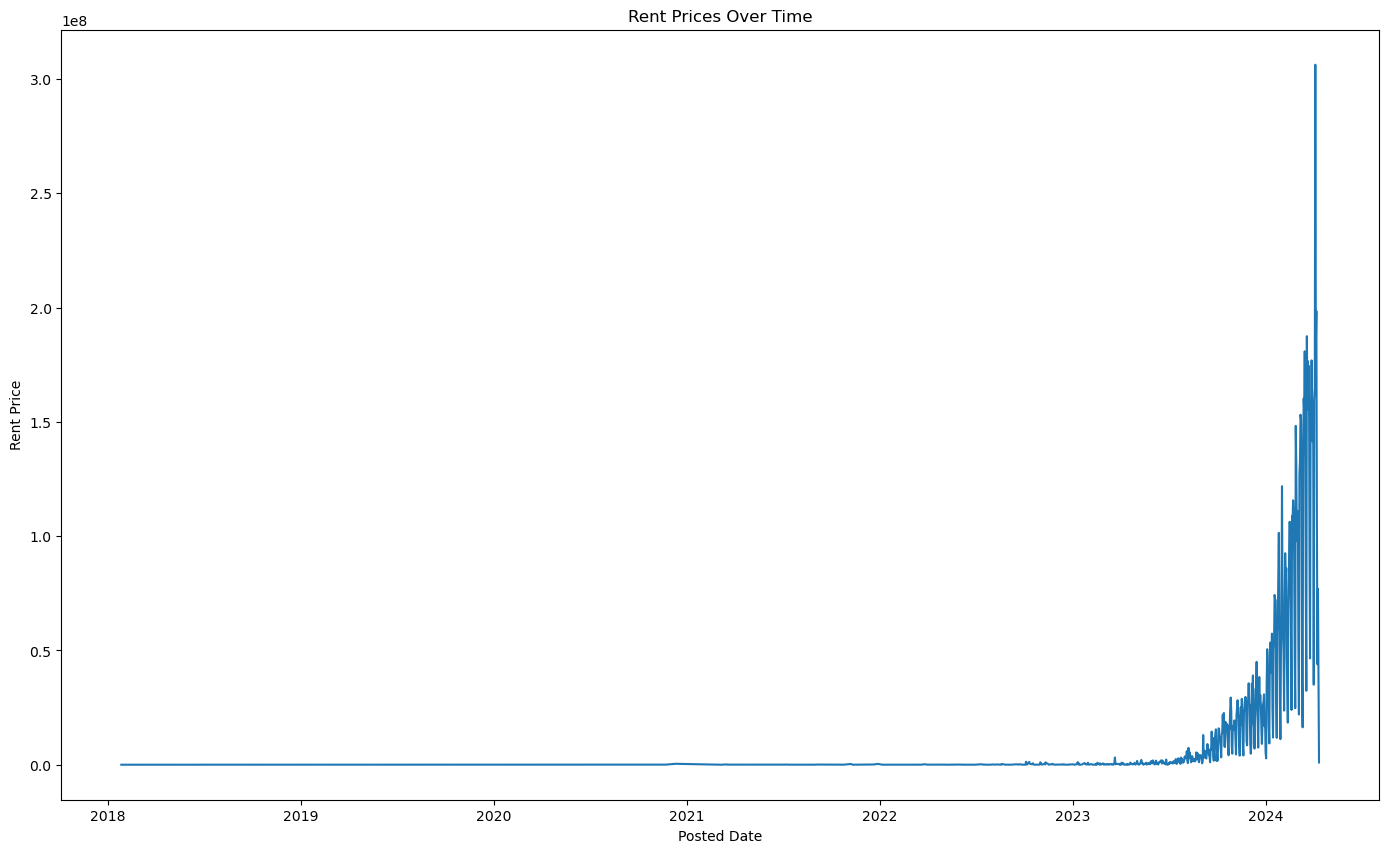

In [8]:
# Show the trend of rent by posting over time
df['Posted_date'] = pd.to_datetime(df['Posted_date'])
Rent_over_time = df.groupby('Posted_date')['Rent'].sum().reset_index()

display(Rent_over_time.sort_values(by='Rent',ascending=False).head(10))
plt.figure(figsize=(17,10))
sns.lineplot(data=Rent_over_time, x='Posted_date',y='Rent')
plt.title('Rent Prices Over Time')
plt.xlabel('Posted Date')
plt.ylabel('Rent Price')
plt.show()

In [9]:
df.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


Text(0.5, 1.0, 'Distribution of Property Type')

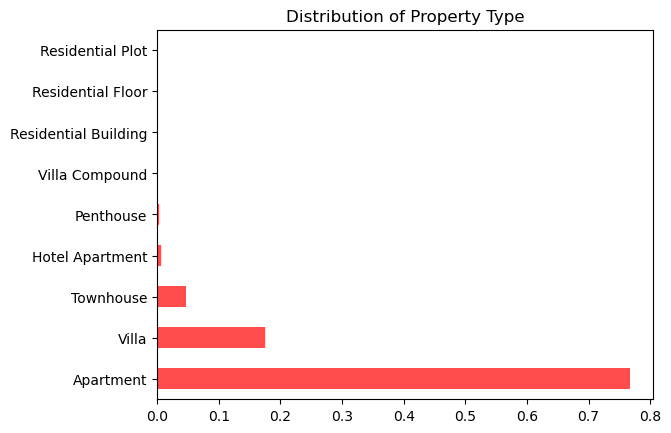

In [10]:
# Plot the distribution property types in the data
df.Type.value_counts(normalize=True).plot.barh(color="red",alpha=0.7)
plt.title("Distribution of Property Type")

<Axes: >

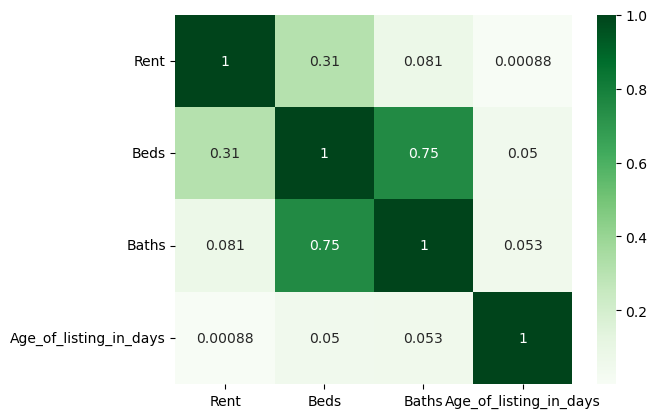

In [11]:
# Plot the correlation matrix to show the correlation between the variables
cor=df[['Rent','Beds','Baths','Age_of_listing_in_days']].corr()
sns.heatmap(cor,cmap='Greens',annot=True)

Text(0.5, 1.0, 'Distribution of Furnishing')

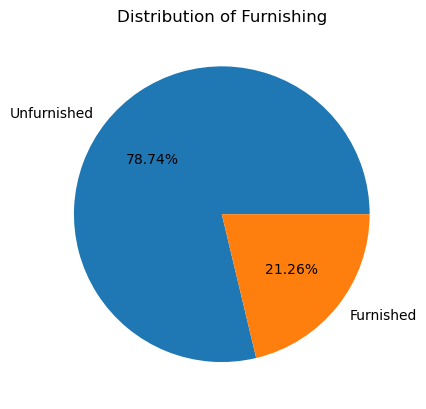

In [12]:
# Show the distribution of the furnishing status
df['Furnishing'].value_counts().plot.pie(autopct="%1.2f%%",ylabel='')
plt.title('Distribution of Furnishing')

In [13]:
# Create the time components for the posted date
df['Posted_date']=pd.to_datetime(df['Posted_date'])
df["Day_of_week"]=df['Posted_date'].dt.dayofweek
df["Month"]=df['Posted_date'].dt.month
df['Day_of_year']=df['Posted_date'].dt.dayofyear
df.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude,Day_of_week,Month,Day_of_year
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841,3,3,67
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372,4,3,68
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939,3,3,81
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841,5,2,55
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372,4,2,47


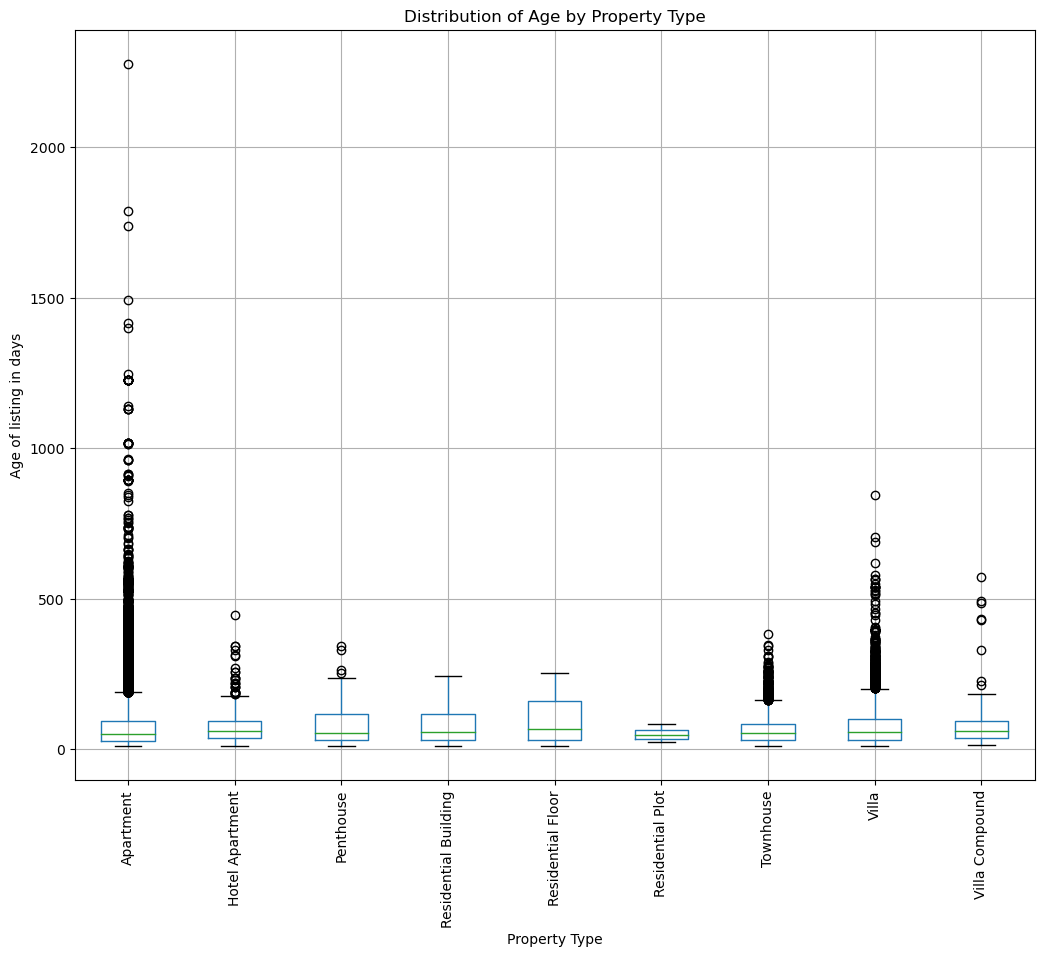

In [14]:
# Show the distribution the age of listing by property type and remove outliers if any
fig,ax=plt.subplots(1,1,figsize=(12,10))
df.boxplot('Age_of_listing_in_days','Type', ax=ax)
plt.suptitle('')
ax.set_title('Distribution of Age by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Age of listing in days')
plt.xticks(rotation=90)
plt.show()

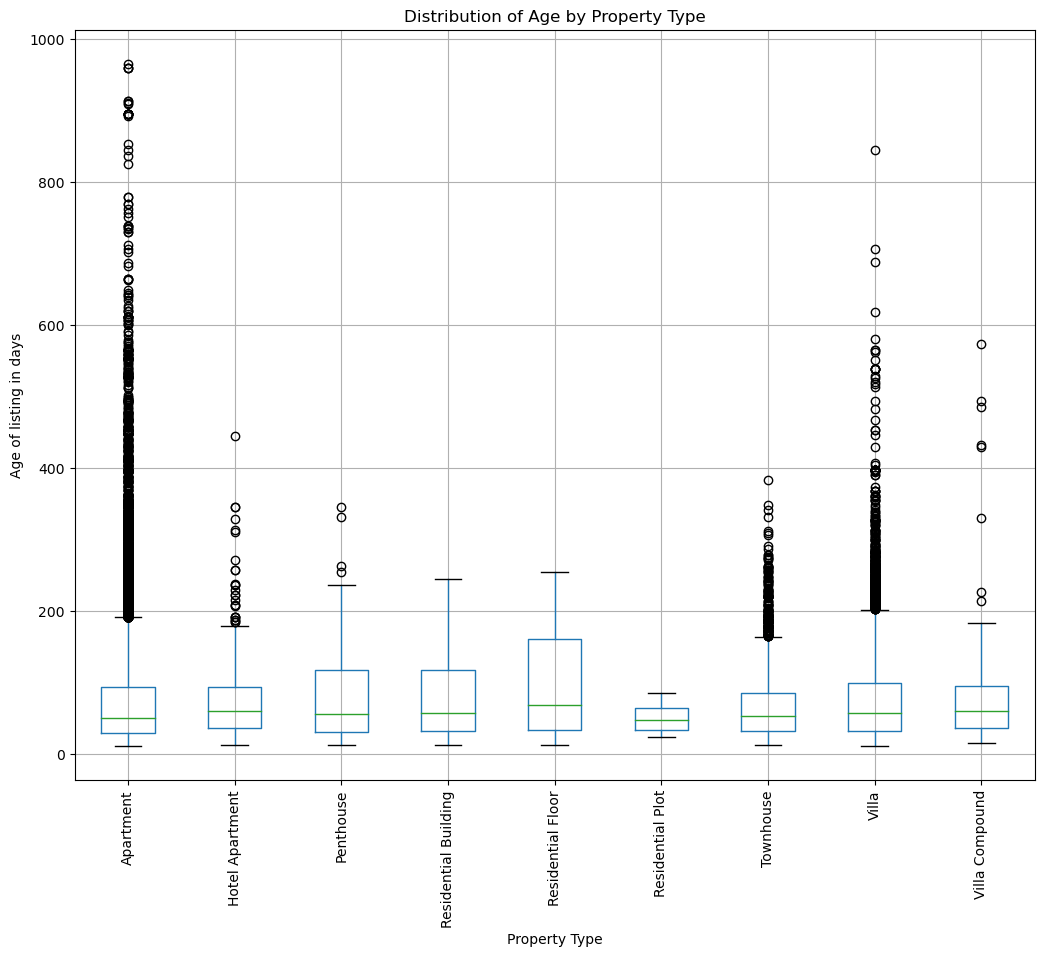

In [15]:
# Remove all property types whose age is equal or more than 1000 days and plot the new distrinbution
df=df[df['Age_of_listing_in_days']<1000]
fig,ax=plt.subplots(1,1,figsize=(12,10))

df.boxplot('Age_of_listing_in_days','Type',ax=ax)
plt.suptitle('')
ax.set_title('Distribution of Age by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Age of listing in days')
plt.xticks(rotation=90)
plt.show()

In [16]:
# Show the distribution of rents by property type to show the order of rent prices by property types
df.groupby('Type')['Rent'].sum().head().sort_values(ascending=False).reset_index()

,Type,Rent
0,Apartment,6197293849
1,Penthouse,129907047
2,Residential Building,126116399
3,Hotel Apartment,104952455
4,Residential Floor,16911925


,City,Rent
0,Dubai,7307607379
1,Abu Dhabi,2688370461
2,Sharjah,454875999
3,Ajman,321003088
4,Al Ain,67225998
5,Ras Al Khaimah,63272050
6,Umm Al Quwain,2940000
7,Fujairah,1986999


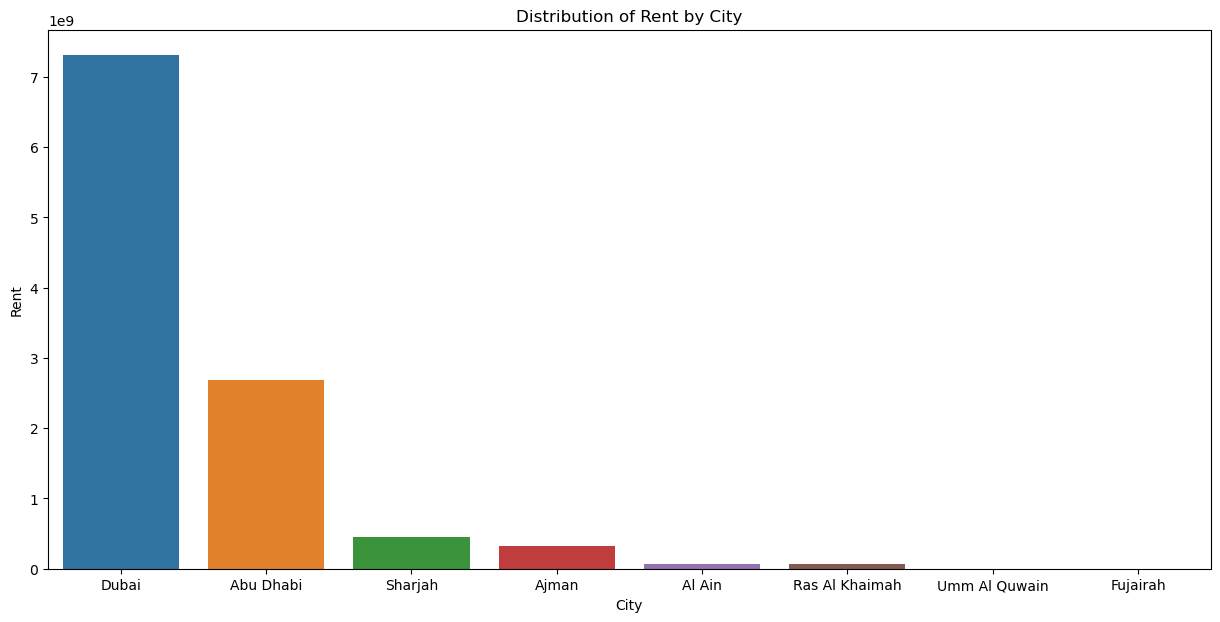

In [17]:
# show the Show the distribution of rents by property type to show the order of rent prices by city
Rent_rank_by_City=df.groupby('City')['Rent'].sum().sort_values(ascending=False).reset_index()
display(Rent_rank_by_City)
plt.figure(figsize=(15,7))
sns.barplot(data=Rent_rank_by_City,x='City',y='Rent')
plt.title('Distribution of Rent by City')
plt.show()

[Back to content](#Table-Of-Content)

# Data Preprocessing
- Feature Selection (Phase 1)
    - Cardinality
        -  High Cardinality
        -  Low Cardinality

In [18]:
# show the number of unique values in each column in the dataset to check for low and high cardinalities
cols = df.columns
for i in cols:
    print(i)
    counts = df[i].nunique()
    print(counts)
    print("---"*35)

Address
4512
---------------------------------------------------------------------------------------------------------
Rent
2099
---------------------------------------------------------------------------------------------------------
Beds
13
---------------------------------------------------------------------------------------------------------
Baths
11
---------------------------------------------------------------------------------------------------------
Type
9
---------------------------------------------------------------------------------------------------------
Area_in_sqft
4964
---------------------------------------------------------------------------------------------------------
Rent_per_sqft
31327
---------------------------------------------------------------------------------------------------------
Rent_category
3
---------------------------------------------------------------------------------------------------------
Frequency
1
---------------------------------------

In [19]:
# Drop the the irrelevant columns
df.drop(['Address','Frequency','Purpose','Latitude','Longitude','Month','Day_of_year','Day_of_week'],axis=1,inplace=True)
df.drop('Posted_date',axis=1,inplace=True)

In [20]:
df.head()

,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Furnishing,Age_of_listing_in_days,Location,City
0,124000,3,4,Apartment,1785,69.467787,Medium,Unfurnished,45,Al Reem Island,Abu Dhabi
1,140000,3,4,Apartment,1422,98.452883,Medium,Unfurnished,44,Yas Island,Abu Dhabi
2,99000,2,3,Apartment,1314,75.342466,Medium,Furnished,31,Al Raha Beach,Abu Dhabi
3,220000,3,4,Penthouse,3843,57.246942,High,Unfurnished,57,Al Reem Island,Abu Dhabi
4,350000,5,7,Villa,6860,51.020408,High,Unfurnished,65,Yas Island,Abu Dhabi


In [21]:
df['Location'].unique()

array(['Al Reem Island', 'Yas Island', 'Al Raha Beach', 'Al Bateen',
       'Al Reef', 'The Marina', 'Al Khalidiyah', 'Al Tibbiya',
       'Al Raha Gardens', 'Mohammed Bin Zayed City', 'Shakhbout City',
       'Madinat Al Riyadh', 'Corniche Area', 'Al Muroor',
       'Zayed Sports City', 'Khalifa City', 'Hamdan Street', 'Al Bahia',
       'Masdar City', 'Al Najda Street', 'Tourist Club Area (TCA)',
       'Al Matar', 'Al Shamkha', 'Rawdhat Abu Dhabi', 'Al Ghadeer',
       'Danet Abu Dhabi', 'Baniyas', 'Al Mushrif', 'Airport Street',
       'Al Jubail Island', 'Al Hosn', 'Saadiyat Island', 'Corniche Road',
       'Sheikh Khalifa Bin Zayed Street', 'Electra Street',
       'Al Falah Street', 'Al Wahdah', 'Al Manaseer', 'Madinat Zayed',
       'Rabdan', 'Al Rahba', 'Navy Gate', 'Al Maqtaa', 'Capital Centre',
       'Al Karamah', 'Al Markaziya', 'Defence Street', 'Al Nahyan',
       'Between Two Bridges (Bain Al Jessrain)', 'Al Nasr Street',
       'Al Zahraa', 'Al Muntazah', 'Al Zaab', 'A

In [22]:
# Create a function to shorten categories in the location variable
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]]='other'
    return categorical_map

In [23]:
# Show the new location variable
location_map = shorten_categories(df['Location'].value_counts(),300)
df['Location']=df['Location'].map(location_map)
df['Location'].value_counts()

other                             17647
Al Reem Island                     3668
Jumeirah Village Circle (JVC)      3117
Downtown Dubai                     3003
Khalifa City                       2751
Dubai Marina                       2600
Business Bay                       2152
Mohammed Bin Zayed City            2054
Muwailih Commercial                2053
Al Raha Beach                      1808
Dubai Creek Harbour                1736
Palm Jumeirah                      1614
Meydan City                        1609
Muwaileh                           1377
Yas Island                         1178
Dubai Hills Estate                 1070
Al Nahda (Sharjah)                  997
Jumeirah Beach Residence (JBR)      920
Al Taawun                           911
Mohammed Bin Rashid City            890
Al Khalidiyah                       887
Madinat Al Riyadh                   767
Dubailand                           742
Aljada                              717
Al Nuaimiya                         693


[Back to content](#Table-Of-Content)

# Removing Outliers from the data
- Using method of trimming

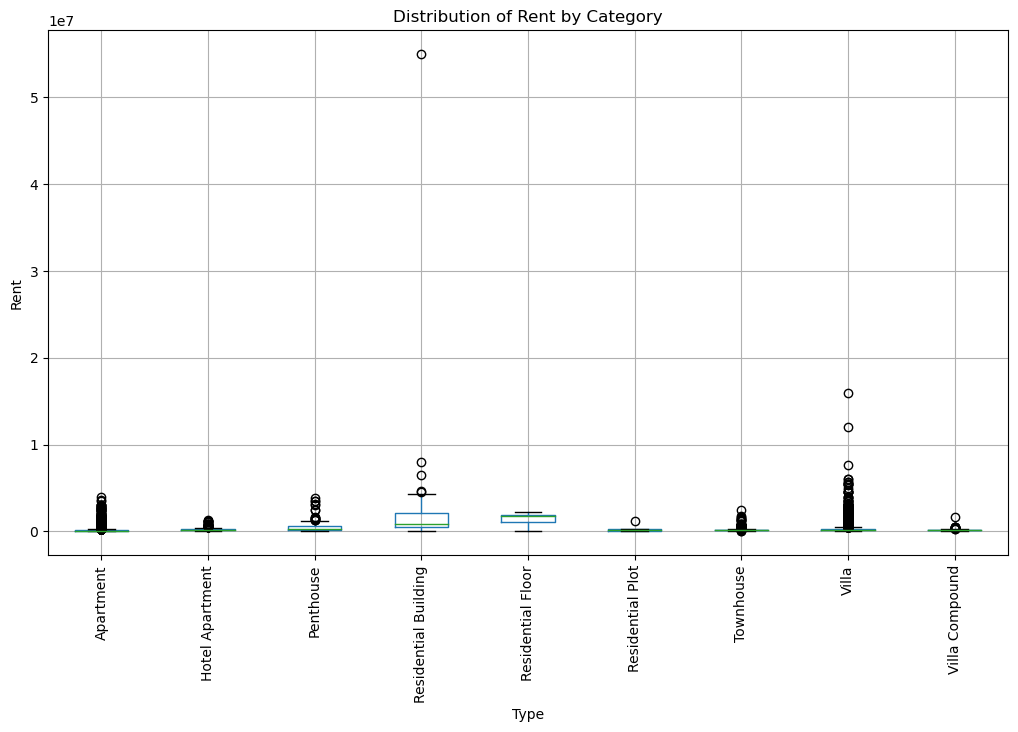

In [24]:
# Show the distribution of the rent by rent categories to remove outliers
fig, ax = plt.subplots(figsize=(12,7))
df.boxplot('Rent', 'Type',ax=ax)
plt.suptitle('')
ax.set_title('Distribution of Rent by Category')
plt.ylabel('Rent')
plt.xticks(rotation=90)
plt.show()


In [25]:
# Remove from the data where rent is greater than 1000000
df=df[df['Rent']<=1000000]

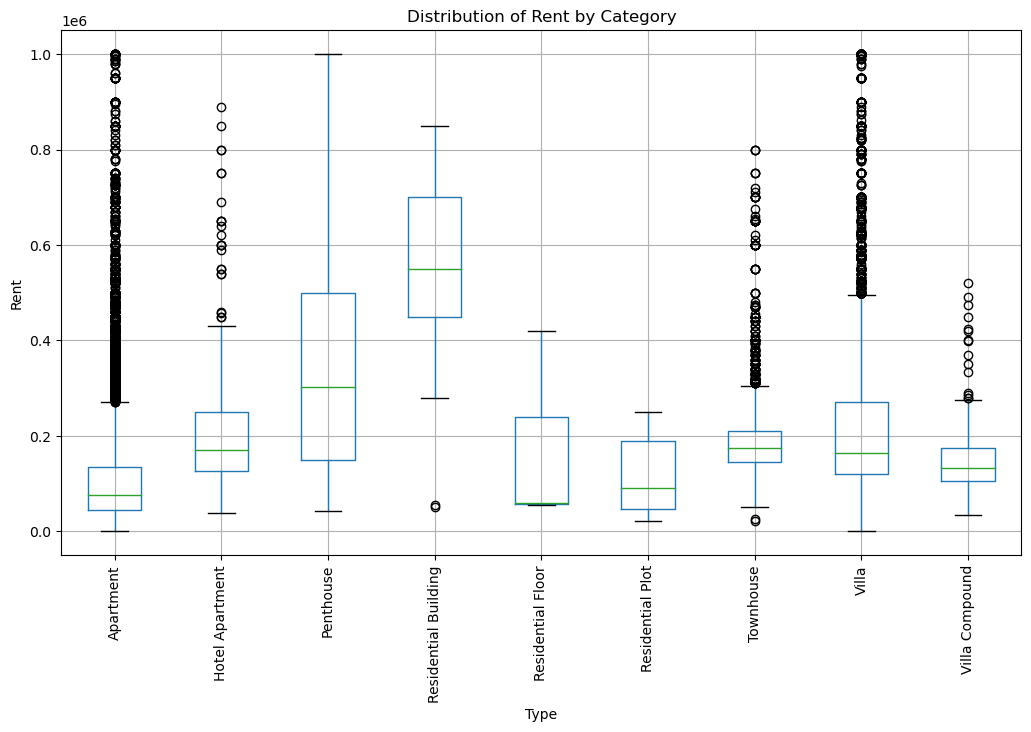

In [26]:
# Create new plot to show the new distributio of rent by category
fig, ax = plt.subplots(figsize=(12,7))
df.boxplot('Rent', 'Type',ax=ax)
plt.suptitle('')
ax.set_title('Distribution of Rent by Category')
plt.ylabel('Rent')
plt.xticks(rotation=90)
plt.show()


# Encode categorical variables

In [27]:
# assign unique values for each categorical variable in the data to a variable 
# to call in the the model deployment stage
df_type = df.Type.unique()
df_rent = df.Rent_category.unique()
df_furn = df.Furnishing.unique()
df_loc = df.Location.unique()
df_city = df.City.unique()

In [28]:

categorical_var = ['Type','Rent_category','Furnishing','Location','City']

le_type = LabelEncoder()
df['Type'] = le_type.fit_transform(df['Type'])

le_rent_category = LabelEncoder()
df['Rent_category'] = le_rent_category.fit_transform(df['Rent_category'])

le_furnishing = LabelEncoder()
df['Furnishing'] = le_furnishing.fit_transform(df['Furnishing'])

le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])

le_city = LabelEncoder()
df['City'] = le_city.fit_transform(df['City'])


In [29]:
df.head()

,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Furnishing,Age_of_listing_in_days,Location,City
0,124000,3,4,0,1785,69.467787,2,1,45,16,0
1,140000,3,4,0,1422,98.452883,2,1,44,57,0
2,99000,2,3,0,1314,75.342466,2,0,31,13,0
3,220000,3,4,2,3843,57.246942,0,1,57,16,0
4,350000,5,7,7,6860,51.020408,0,1,65,57,0


# Check for multicollinearity issues

In [30]:
df.corr()

,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Furnishing,Age_of_listing_in_days,Location,City
Rent,1.000000,0.505153,0.203530,0.369549,0.392991,0.473242,-0.519832,-0.175671,0.007061,0.083465,-0.028626
Beds,0.505153,1.000000,0.767141,0.713843,0.631118,-0.230311,-0.265873,0.203304,0.057026,0.071638,-0.208590
Baths,0.203530,0.767141,1.000000,0.560285,0.530064,-0.265733,-0.050255,0.175727,0.060571,0.011283,-0.316976
Type,0.369549,0.713843,0.560285,1.000000,0.544558,-0.239741,-0.235447,0.191206,0.005257,0.203041,-0.114408
Area_in_sqft,0.392991,0.631118,0.530064,0.544558,1.000000,-0.239163,-0.218180,0.130229,0.022451,0.105648,-0.111636
Rent_per_sqft,0.473242,-0.230311,-0.265733,-0.239741,-0.239163,1.000000,-0.224238,-0.515139,-0.059071,-0.031353,0.113665
Rent_category,-0.519832,-0.265873,-0.050255,-0.235447,-0.218180,-0.224238,1.000000,0.053323,-0.017335,-0.132672,-0.067649
Furnishing,-0.175671,0.203304,0.175727,0.191206,0.130229,-0.515139,0.053323,1.000000,0.047564,0.039969,-0.112056
Age_of_listing_in_days,0.007061,0.057026,0.060571,0.005257,0.022451,-0.059071,-0.017335,0.047564,1.000000,-0.006848,-0.104558
Location,0.083465,0.071638,0.011283,0.203041,0.105648,-0.031353,-0.132672,0.039969,-0.006848,1.000000,0.037215


[Back to content](#Table-Of-Content)

# Building the model
- Select the features and the target variables
- Check for statistical significance of the variables
- Split the data into training and testing data
- Build the Linear Regression Model

In [31]:
# convert Rent and rent per sqft currency from AED to GHC (AED 1 = GHC 4.47)
df['Rent_in_ghc'] = df['Rent'].mul(4.47).round(2)
df.drop('Rent',axis=1, inplace=True)

df['Rent_per_sqft_in_ghc'] = df['Rent_per_sqft'].mul(4.47).round(2)
df.drop('Rent_per_sqft', axis=1, inplace=True)


In [32]:
df.head()

,Beds,Baths,Type,Area_in_sqft,Rent_category,Furnishing,Age_of_listing_in_days,Location,City,Rent_in_ghc,Rent_per_sqft_in_ghc
0,3,4,0,1785,2,1,45,16,0,554280.0,310.52
1,3,4,0,1422,2,1,44,57,0,625800.0,440.08
2,2,3,0,1314,2,0,31,13,0,442530.0,336.78
3,3,4,2,3843,0,1,57,16,0,983400.0,255.89
4,5,7,7,6860,0,1,65,57,0,1564500.0,228.06


In [33]:
X = df.drop(columns=['Rent_in_ghc'], axis=1)
y = df['Rent_in_ghc']

In [34]:

# Perform F-Test
selector = SelectKBest(score_func = f_classif, k='all')
selector.fit(X,y)

# Get F-score and p-values
f_score = selector.scores_
p_values = selector.pvalues_

# Create a dataframe to display f-scores and p-values
feature_scores_df = pd.DataFrame({'Features':X.columns,'F-Scores':f_score,'P-Values':p_values})
feature_scores_df = feature_scores_df.sort_values(by = 'P-Values', ascending = True)
feature_scores_df

C:\Users\Emmanuel Kwofie\.jupyter\.jupiter(1)\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


,Features,F-Scores,P-Values
0,Beds,22.170598,0.000000e+00
1,Baths,10.056909,0.000000e+00
2,Type,11.447004,0.000000e+00
3,Area_in_sqft,9.475170,0.000000e+00
4,Rent_category,inf,0.000000e+00
5,Furnishing,3.864729,0.000000e+00
8,City,7.342359,0.000000e+00
9,Rent_per_sqft_in_ghc,16.675462,0.000000e+00
7,Location,2.820408,5.879381e-322
6,Age_of_listing_in_days,1.850175,1.145090e-99


In [35]:
# Splitting the dataset in training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size = 0.1)

In [36]:
#Calculating the baseline Mean Absolute Error
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
baseline_mae = mean_absolute_error(y_train,y_pred_baseline)

print(f"Mean Rent Price: {y_mean}")
print(f"Baseline MAE: {baseline_mae}")

Mean Rent Price: 590813.7495050392
Baseline MAE: 368575.96388409304


# Linear Regression Model

In [37]:
# Building our Linear Regression Model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
# Predicting and evaluating the model on our training dataset
y_train_pred = model.predict(X_train)

#=======# Finding the mean absolute error at the training phase#=======#
mae = mean_absolute_error(y_train,y_train_pred)

print(f"Training MAE: {mae:.2f}")

Training MAE: 163315.03


In [39]:
# Predicting and evaluating the model on our testing dataset
y_test_pred = model.predict(X_test)

#=======# Finding the mean absolute error at the testing phase#=======#
mae = mean_absolute_error(y_test,y_test_pred)

print(f"Testing MAE: {mae:.2f}")

Testing MAE: 162969.44


[Back to content](#Table-Of-Coontent)

# Model Communication (Linear Regression)

In [40]:
# Finding the intercept for our linear model
round(model.intercept_,2)

-33795.03

In [41]:
# Finding the coefficients of the independent variables
coefficient = model.coef_
feature = X.columns

# Create a dataframe for proper visualization
importance_df = pd.DataFrame({'Feature': feature, 'coefficient':coefficient})
importance_df.sort_values(by='coefficient', ascending=False, inplace=True)
importance_df

,Feature,coefficient
0,Beds,222138.800624
5,Furnishing,13015.884971
2,Type,11486.533322
9,Rent_per_sqft_in_ghc,1133.726771
6,Age_of_listing_in_days,81.647840
7,Location,59.697182
3,Area_in_sqft,43.125632
8,City,-9633.542827
1,Baths,-99609.867989
4,Rent_category,-121567.354971


In [42]:
# The multiple linear equation is
print(f"Multiple linear equation: y = {model.intercept_} + {round(list(coefficient)[0],2)} Beds  {round(list(coefficient)[1],2)} Furnishing + {round(list(coefficient)[2],2)} Type + {round(list(coefficient)[3],2)} Rent_per_sqft  + {round(list(coefficient)[4],2)} Age_of_listing_in_days  {round(list(coefficient)[5],2)} Location  + {round(list(coefficient)[7],2)} City + {round(list(coefficient)[6],2)} Baths + {round(list(coefficient)[7],2)} Rent_category")

Multiple linear equation: y = -33795.03433273407 + 222138.8 Beds  -99609.87 Furnishing + 11486.53 Type + 43.13 Rent_per_sqft  + -121567.35 Age_of_listing_in_days  13015.88 Location  + 59.7 City + 81.65 Baths + 59.7 Rent_category


### Our multiple linear equation
Multiple linear equation: $y = -33794.978890929255 + 222138.81 Beds  -99609.89 Furnishing + 11486.54 Type + 43.13 Rent per sqft  + 5067.76 Age of listing in days  -121567.34 Location + 13015.86 Area in sqft + 81.65 City + 59.7 Baths  -9633.54 Rent category$

[Back to content](#Table-Of-Content)

# Trying with other Non-linear Regression models


#### 1. Trying with RandomForestRegressor 

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[None,80,100],
    'n_estimators': [80,100],
    'min_samples_split':[2,5],
    'min_samples_leaf':[1,2],
    'max_features':['log2',0.8],
    'bootstrap':[True]
}

grid_search = GridSearchCV(
    estimator = RandomForestRegressor(random_state = 42),
    param_grid = params,
    cv = 5,
    scoring = 'r2',
    refit = 'rmse',
    n_jobs = -1,
    verbose = 1
)

grid_search

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None, 80, 100],
                         'max_features': ['log2', 0.8],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [80, 100]},
             refit='rmse', scoring='r2', verbose=1)

In [44]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None, 80, 100],
                         'max_features': ['log2', 0.8],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [80, 100]},
             refit='rmse', scoring='r2', verbose=1)

In [45]:
best_params = grid_search.best_params_
best_params

{'bootstrap': True,
 'max_depth': None,
 'max_features': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [47]:
forest_model = RandomForestRegressor(random_state = 42, **best_params)
forest_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.8, random_state=42)

In [49]:
forest_prediction = forest_model.predict(X_test)

In [58]:
# Evaluating the model
#Calculate the key metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, forest_prediction)
print(f'Mean Absolute Error score:{mae:.2f}')

Mean Absolute Error score:4309.64


# Model Communication (RandomForestRegressor)



In [66]:
feat_imp = forest_model.feature_importances_.tolist()
feat_imp

index_list = X_train.columns.tolist()
index_list

importance_data_frame = pd.DataFrame({'Features':index_list, 'Importance':feat_imp})
importance_data_frame = importance_data_frame.sort_values(by='Importance', ascending = False)
importance_data_frame

,Features,Importance
4,Rent_category,0.498667
9,Rent_per_sqft_in_ghc,0.233476
3,Area_in_sqft,0.181849
0,Beds,0.057960
1,Baths,0.018137
8,City,0.005690
7,Location,0.001558
2,Type,0.001181
6,Age_of_listing_in_days,0.001053
5,Furnishing,0.000428


# Findings
 
  ***1. FINDINGS FROM THE EDA***
 - The visualization of the rent posting over time shows an upward trend in rent, and highlights the fluctuation of rents over time, indicating the instability of rent over time.
 - The data also highlights that most of the property types in the data are apartment, followed by villa and the other types in descending order of counts, with residential plots holding the least counts.    
 - The correlation matrix highlights very low correlations between each of the independent variables and the rent, the target variable, with the exception of the number of beds variable which has a low correlation(**0.31**) with the rent variable.
 - The matrix also does not show any multicollinearity issues since the correlations between the independent variables are not very strong.
 - The analysis shows that rent prices are higher in Dubai, followed by Abu Dhabi, Sharjah, Ajman, Al Ain,Ras Al Khaimah, Umm Al Quwain and Fujairah. It shows that Fujairah has the least rent price.
  
***2. FINDINGS FROM THE MODEL***   
**Our multiple linear equation shows that:**
 - a unit increase in the number of beds is associated with an increase in rent by ***GHC222138.81***,  h olding other variables constant.
 - a unit increase in the number of furnishing is associated with a decrease in rent by ***GHC99609.89***,  holding other variables constant.
 - a unit increase in the number of property type is associated with an increase in rent by ***GHC11486.54***, holding other variables constant.
 - a unit increase in the size of the rent per square feet is associated with an increase rent by ***GHC43.13***, holding other variables constant.
 - a unit increase in the age(days) of the listing is associated with an increase in the rent by ***GHC5067.76***, holding other variables constant.
 - a unit increase in the age(days) of the number of locations is associated with a decrease in the rent by ***GHC121567.34***, holding other variables constant.
 - a unit increase in the a𝑟𝑒𝑎 (𝑖𝑛 𝑠𝑞𝑓) of the property is associated with an increase in the rent by ***GHC13015.86***, holding other variables constant.
 - a unit increase in the number of the cities is associated with an increase in the rent by ***GHC81.65***, holding other variables constant.
 - a unit increase in the number of bathrooms is associated with an increase in the rent by ***GHC59.7***, holding other variables constant.
 - an additional unit in rent category is associated with a decrease in the rent by ***GHC9633.54***, holding other variables constant.
 
     - The model gives a mean absolute error of ***162969.44***, which is very high when compared to the RandomForestRegressor model

***3. Finding from the RandomForestRegressor model***
 - The model gives us a mean absolute error of ***4309.64*** which is the lowest error when compared to the Linear Regression model.
 
                 - comparing the two models, the RandomForestRegressor model gives the lowest error. Hence, RandomForestRegressor model is used for the model deployment
                 
- The general contribution of each feature from the model, according to the model communication, shows that the rent category is the best contributor to the model followed by the rent per squared feet and the others in the descending order, with the furnishing status variable being the least contributor to the model.

[Back to content](#Table-Of-Content)

# Model Deployment

In [57]:
# Create a function to predict stroke
def predict_rent(beds, baths, type_input,area_in_sqft,rent_category, furnishing, age_of_listing_in_days,location,city, rent_per_sqft_in_ghc,progress=gr.Progress()):
    # Transform categorical inputs
    progress(0, desc = "Transforming the categorical inputs...")
    time.sleep(1)
    type_encoded = le_type.transform([type_input])
    rent_category_encoded = le_rent_category.transform([rent_category])
    furnishing_encoded = le_furnishing.transform([furnishing])
    location_encoded = le_location.transform([location])
    city_encoded = le_city.transform([city])
    
    progress(50, desc='Preparing prediction')
    
    # Create dataframe for model inputs
    input_data = pd.DataFrame({
        'Beds':[beds],
        'Baths':[baths],
        'Type':[type_encoded],
        'Area_in_sqft':[area_in_sqft],
        'Rent_category':[rent_category_encoded],
        'Furnishing':[furnishing_encoded],
        'Age_of_listing_in_days':[age_of_listing_in_days],
        'Location':[location_encoded],
        'City':[city_encoded],
        'Rent_per_sqft_in_ghc':[rent_per_sqft_in_ghc]
    })
    # Make predictions
    y_pred = forest_model.predict(input_data)
    progress(100, desc = "Prediction Ready...")
    return float(round(y_pred[0],2))

# Set up gradio interface
app = gr.Interface(
    title = 'Rent Prediction', 
    fn = predict_rent,
    inputs=[
        gr.Number(label = 'Number of Bedrooms'),
        gr.Number(label = 'Number of Bathrooms'),
        gr.Dropdown(label = 'Property Type', choices = list(df_type)),
        gr.Number(label = 'Area in Sqft'),
        gr.Dropdown(label = 'Rent Category', choices = list(df_rent)),
        gr.Dropdown(label = 'Furnishing Status', choices = list(df_furn)),
        gr.Number(label = 'Age of listing (Days)'),
        gr.Dropdown(label = 'Location', choices = list(df_loc)),
        gr.Dropdown(label = 'City', choices = list(df_city)),
        gr.Number(label = ' Rent Per Square Feet (GHC)')
    ], 
    outputs = gr.Number(label = 'Predict Rent Price (GHC)'),
    
    description = f'The app takes the required user inputs to predict rent price.\n The examples of inputs are added below to guide you.\nYou can click on a row and click predict to make prediction. You can as well share the link to your friends to try their hands on it.',
    submit_btn = 'Predict',
   examples = [[3,4,"Apartment",1785,"Medium","Furnished",45,"Al Reem Island","Ajman",310.52],[2,3,"Penthouse",1678,"High","Furnished",50,"Yas Island","Al Ain",290.51]],
    flagging_dir = ".gradio/flagged",
    flagging_callback = None,
    deep_link = True
)
app.launch(share=True)

********************************************
* Trying to transpile functions from Python -> JS for performance

* (1/1) <lambda>: ✅
********************************************

* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Missing file: C:\Users\Emmanuel Kwofie\.cache\huggingface\gradio\frpc\frpc_windows_amd64_v0.3. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.3/frpc_windows_amd64.exe
2. Rename the downloaded file to: frpc_windows_amd64_v0.3
3. Move the file to this location: C:\Users\Emmanuel Kwofie\.cache\huggingface\gradio\frpc
